In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import numpy as np
import cv2.cv2 as cv2
%matplotlib inline
import glob
import pickle

def calibrate_camera(images, nx=9, ny=6):
    objpoints = []
    imgpoints = []
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    img = None
    for file in images:
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        if ret==True:
            imgpoints.append(corners)
            objpoints.append(objp)
            img_d = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            file_name = './output_images/' + file[13:]
            cv2.imwrite(file_name, img_d)

        if len(objpoints) == len(imgpoints) and len(objpoints) > 0:
            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
            dist_pickle = {}
            dist_pickle['mtx'] = mtx
            dist_pickle['dist'] = dist
        else:
            print("not enough points to calibrate")
            return

    return ret, mtx, dist, rvecs, tvecs, img

image = glob.glob('./camera_cal/calibration*.jpg')
ret,mtx,dist,rvecs,tvecs,img = calibrate_camera(image)

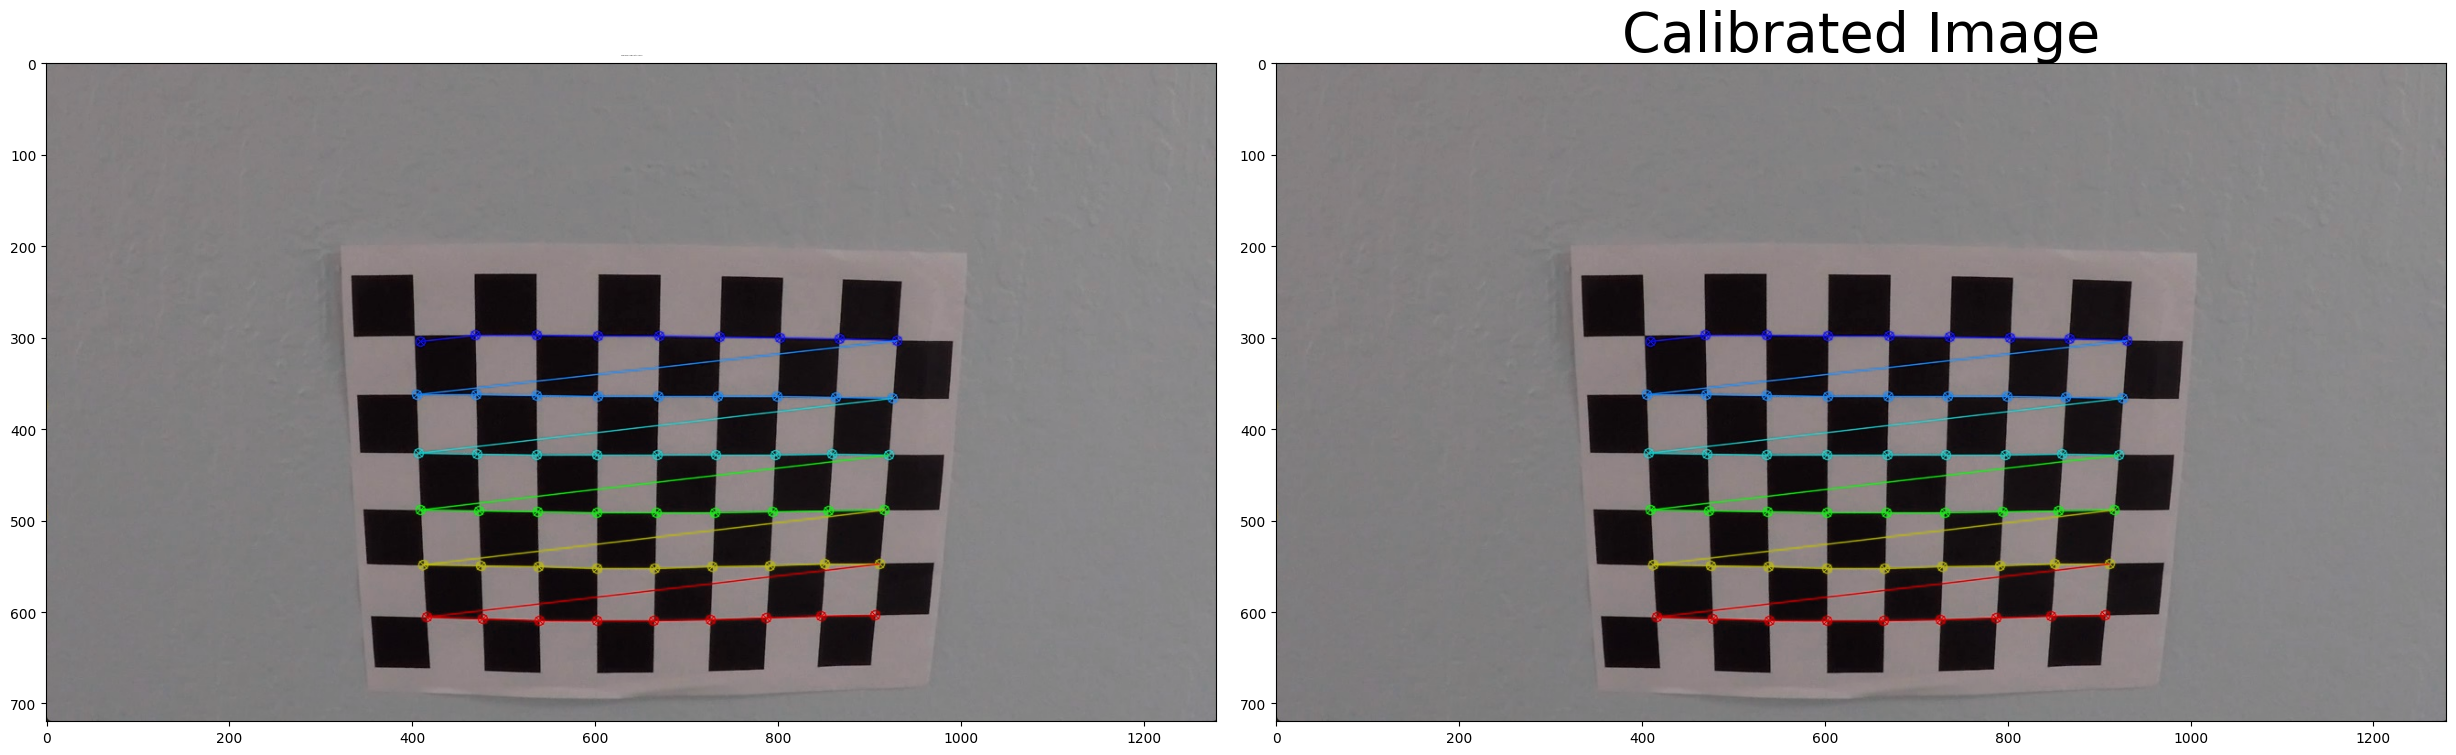

In [6]:
img2 = cv2.imread('./output_images/calibration17.jpg')
img = cv2.imread('./output_images/calibration17.jpg')
undistorted = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Chessboard Calibration Image', fontsize=0)
ax2.imshow(img2)
ax2.set_title('Calibrated Image', fontsize=40)
plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.0)

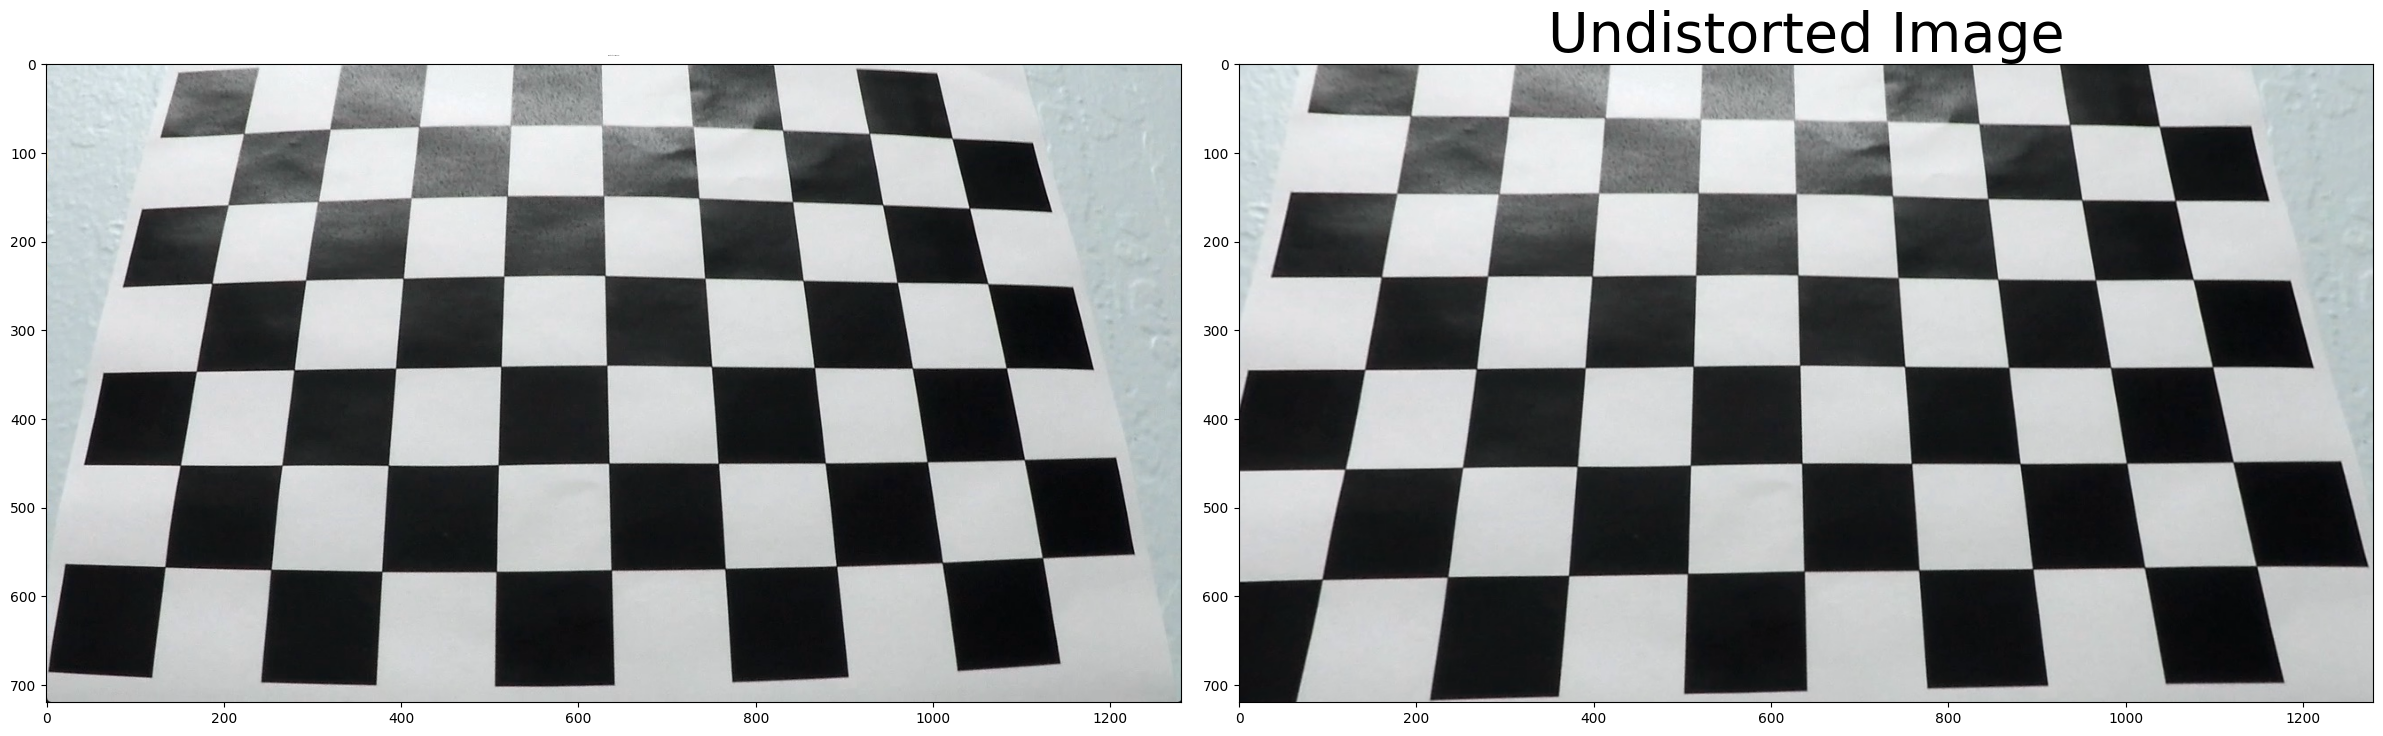

Text(0.5, 1.0, 'Undistorted Image')

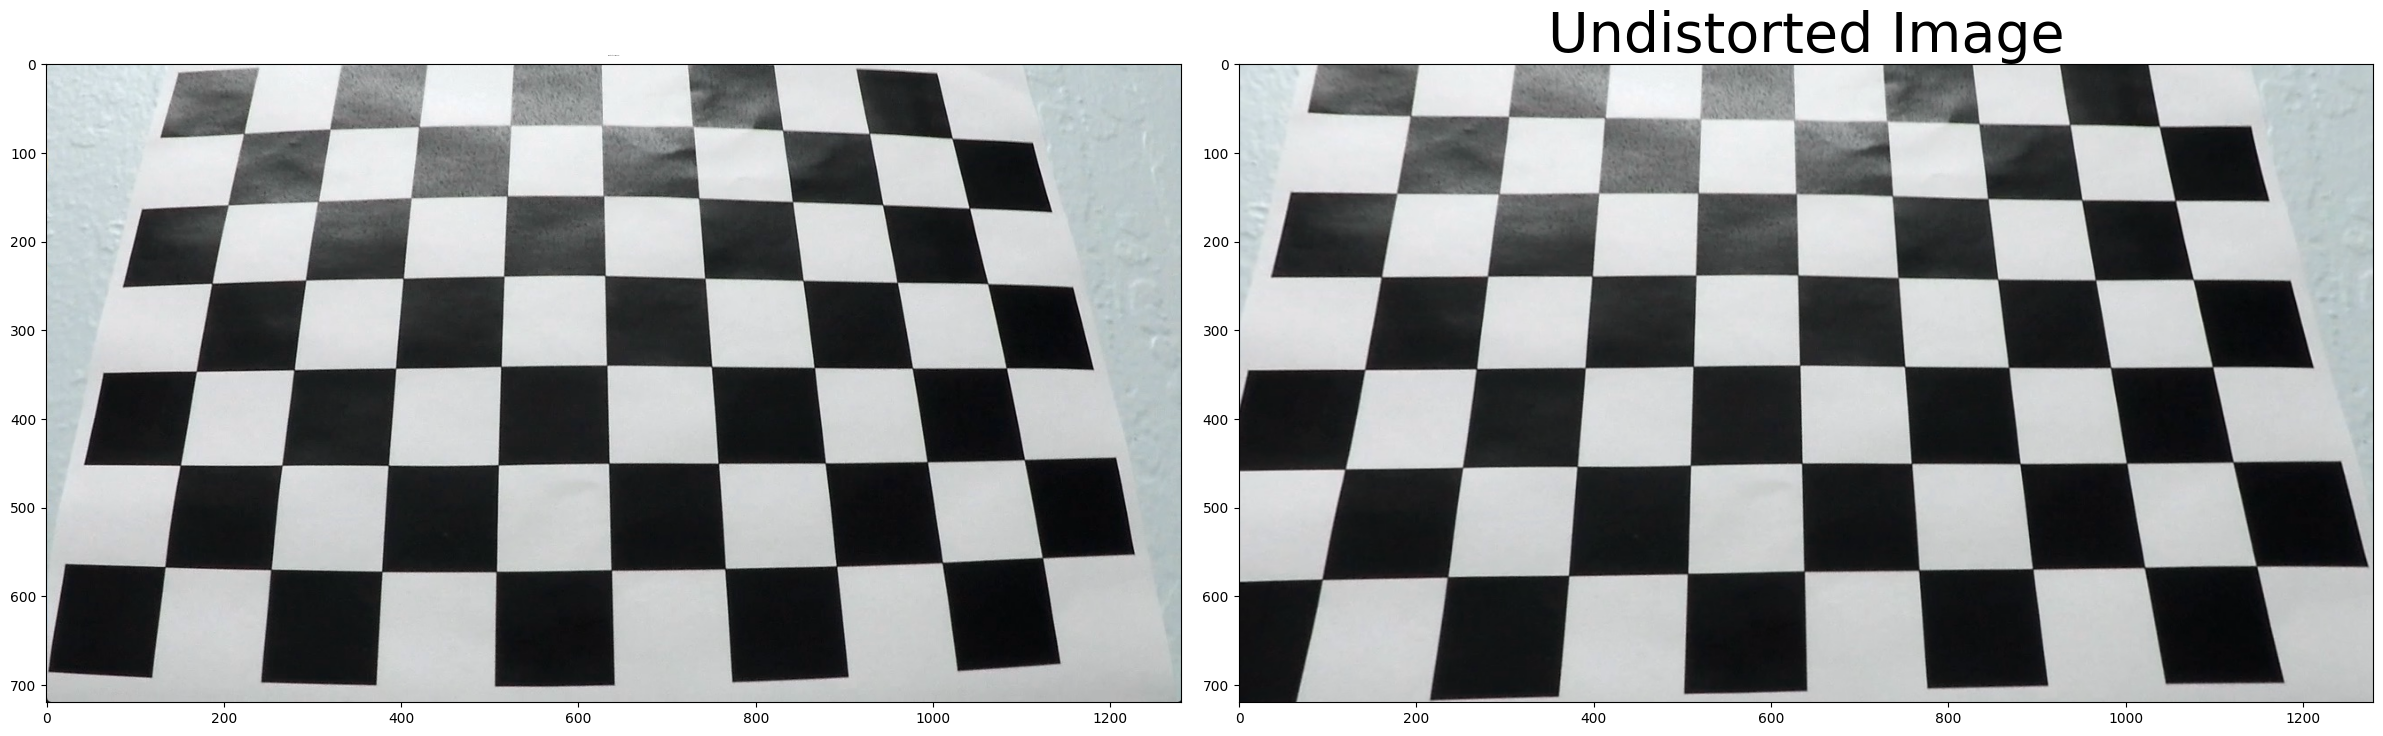

In [8]:
img = cv2.imread('./camera_cal/calibration3.jpg')
undistorted = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Distorted Image', fontsize=0)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=40)